<a href="https://colab.research.google.com/github/IsharaSilva/Prediction-Recommedation-system-for-Potato-Cultivation/blob/main/Detection_of_Fungal_types_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install rembg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.7/47.7 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 55.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 55.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 66.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 59.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 kB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 kB 28.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from skimage import img_as_ubyte 
from rembg import remove

from skimage.util import img_as_float
from skimage.filters import sobel
import os
import tensorflow as tf ## pip install tensorflow
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
my_folder_path = 'https://drive.google.com/drive/folders/1J_XyVRFE15SzLjFtT4Z1OrabYlNeDHGQ?usp=share_link'

In [ ]:
!git clone https://github.com/IsharaSilva/Prediction-Recommedation-system-for-Potato-Cultivation.git

Cloning into 'Prediction-Recommedation-system-for-Potato-Cultivation'...
remote: Enumerating objects: 40, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 40 (delta 20), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (40/40), 5.67 MiB | 6.24 MiB/s, done.


In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Collect Data

In [23]:
import os
path = os.listdir('/content/drive/MyDrive/Fungal/SmallFungalDataset/Training')
classes = {'Early_Blight':0, 'Late_Blight':1}

Preprocessing (Resize,color contrast, histrogram,clahe)

In [25]:
import cv2
img_no=1
x=[]
y=[]
z=[]
histo=[]
for cls in classes:
    pth = '/content/drive/MyDrive/Fungal/SmallFungalDataset/Training/'+cls
    for j in os.listdir(pth):
        originalImage = cv2.imread(pth+'/'+j,1)
        #Resize
        resizedImage = cv2.resize(originalImage, (200,200))
        #contrast improve
        colorContrastImage=img_as_ubyte(cv2.cvtColor(resizedImage, cv2.COLOR_BGR2RGB))
        #smooth image
        #smoothImage=img_as_ubyte(cv2.GaussianBlur(colorContrastImage, (5,5), 0, borderType=cv2.BORDER_CONSTANT))
        #Histogram equalize
        R, G, B = cv2.split(colorContrastImage)
        op_R= cv2.equalizeHist(R)
        op_G= cv2.equalizeHist(G)
        op_B= cv2.equalizeHist(B)
        histogramImage=cv2.merge((op_R,op_G,op_B))
        #clahe apply
        clahe = cv2.createCLAHE(clipLimit=2.0,tileGridSize=(8,8))
        op2_R= clahe.apply(R)
        op2_G= clahe.apply(G)
        op2_B= clahe.apply(B)
        claheImage=cv2.merge((op2_R,op2_G,op2_B))
        x.append(claheImage)
        ##cv2.imwrite('../FungalDataset1/Preprocessed1/'+str(img_no)+'.jpg',claheImage) 
        img_no+=1
        y.append(classes[cls])
        z.append(originalImage)
        histo.append(histogramImage)

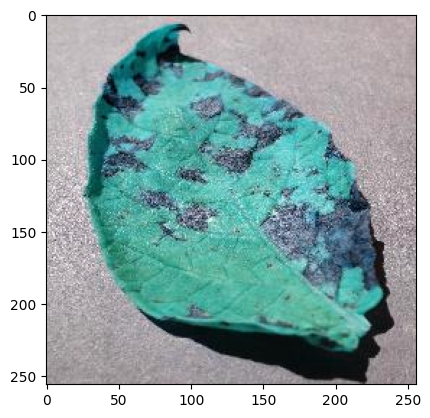

In [26]:
plt.imshow(z[1])

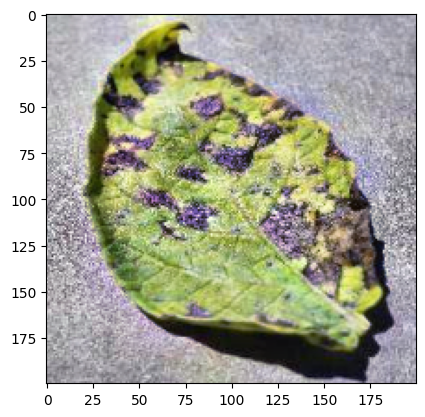

In [27]:
plt.imshow(x[1])

In [28]:
print(resizedImage.shape)

(200, 200, 3)


Removing Background

In [29]:
q=[]
for j in x:
        new_img = img_as_ubyte(j)
        bg_rem_img = remove(new_img)
        bg_rem_img_BGR = cv2.cvtColor(bg_rem_img, cv2.COLOR_BGR2RGB)
        q.append(bg_rem_img)

100%|███████████████████████████████████████| 176M/176M [00:00<00:00, 54.2GB/s]


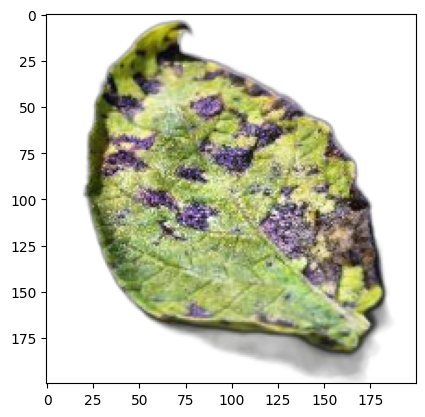

In [30]:
plt.imshow(q[1])

Start - HOG

In [31]:
from skimage.io import imread, imshow
from skimage.feature import hog
from skimage import exposure

In [32]:
h=[]
MC=True
for j in q:
    hogfv, hog_image = hog(j, orientations=9, pixels_per_cell=(16, 16),
                    cells_per_block=(2, 2), visualize=True, multichannel=MC)
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0,5))
    h.append(hog_image_rescaled)

<ipython-input-32-0562a0bac338>:4: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  hogfv, hog_image = hog(j, orientations=9, pixels_per_cell=(16, 16),


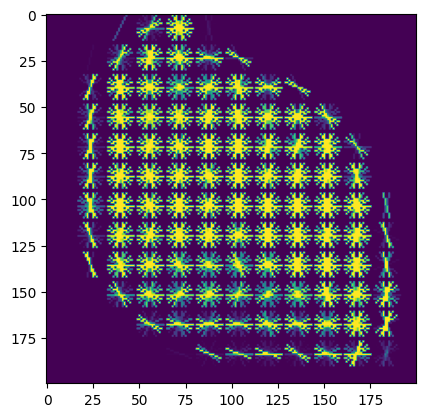

In [33]:
plt.imshow(h[1])

End HOG

In [34]:
h = np.array(h)
y = np.array(y)

In [35]:
np.unique(h)

array([0.00000000e+00, 7.81250000e-04, 1.10485433e-03, ...,
       9.99803543e-01, 9.99846458e-01, 1.00000000e+00])

In [36]:
np.unique(y)

array([0, 1])

In [37]:
h.shape

(10, 200, 200)

Prepare Data

In [38]:
h_updated = h.reshape(len(h), -1)
h_updated.shape

(10, 40000)

Split Data

In [39]:
htrain, htest, ytrain, ytest = train_test_split(h_updated, y, random_state=10,
                                               test_size=.20)

In [40]:
htrain.shape, htest.shape

((8, 40000), (2, 40000))

Feature Scaling

In [41]:
print(htrain.max(), htrain.min())
print(htest.max(), htest.min())
htrain = htrain/255
htest = htest/255
print(htrain.max(), htrain.min())
print(htest.max(), htest.min())

1.0 0.0
1.0 0.0
0.00392156862745098 0.0
0.00392156862745098 0.0


Feature Selection: PCA

In [43]:
from sklearn.decomposition import PCA

In [44]:
print(htrain.shape, htest.shape)

pca = PCA(.98)
# pca_train = pca.fit_transform(xtrain)
# pca_test = pca.transform(xtest)
pca_train = htrain
pca_test = htest

(8, 40000) (2, 40000)


Train Model

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [46]:
import warnings
warnings.filterwarnings('ignore')

lg = LogisticRegression(C=0.1)
lg.fit(pca_train, ytrain)

LogisticRegression(C=0.1)

In [47]:
LogisticRegression(C=0.1)

LogisticRegression(C=0.1)

In [48]:
sv = SVC()
sv.fit(pca_train, ytrain)

SVC()

In [49]:
SVC()

SVC()

Evaluation

In [50]:
print("Training Score:", lg.score(pca_train, ytrain))
print("Testing Score:", lg.score(pca_test, ytest))

Training Score: 0.875
Testing Score: 0.0


In [51]:
print("Training Score:", sv.score(pca_train, ytrain))
print("Testing Score:", sv.score(pca_test, ytest))

Training Score: 0.875
Testing Score: 0.0


Prediction

In [52]:
pred = sv.predict(pca_test)
np.where(ytest!=pred)

(array([0, 1]),)

In [53]:
from array import array

In [54]:
from numpy import int64

In [55]:
pred[1]

1

In [56]:
ytest[1]

0

Test Model

In [57]:
dec = {0:'Early Blight', 1:'Late Blight'}

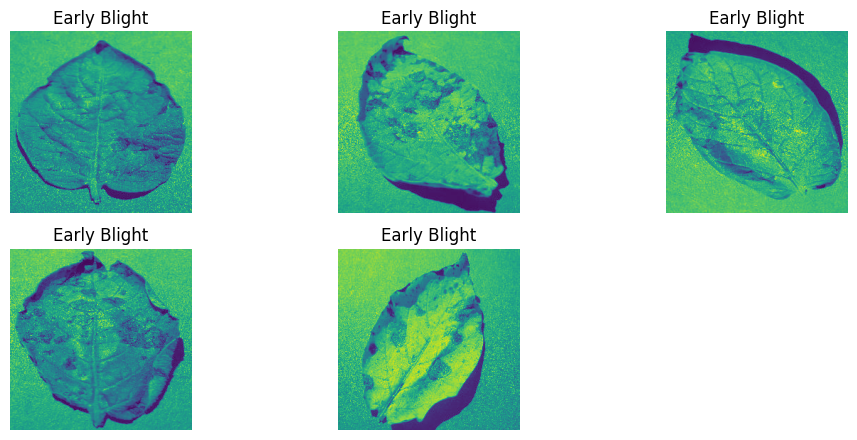

In [58]:
plt.figure(figsize=(12,8))
p = os.listdir('/content/drive/MyDrive/Fungal/SmallFungalDataset/Training/')
c=1
for i in os.listdir('/content/drive/MyDrive/Fungal/SmallFungalDataset/Training/Early_Blight/')[:9]:
    plt.subplot(3,3,c)
    
    img = cv2.imread('/content/drive/MyDrive/Fungal/SmallFungalDataset/Training/Early_Blight/'+i,0)
    
    if img is None:
        print('Wrong path:', path)
    
    else:
        img1 = cv2.resize(img, (200,200))
        img1 = img1.reshape(1,-1)/255
        p = sv.predict(img1)
        plt.title(dec[p[0]])
        plt.imshow(img)
        plt.axis('off')
        c+=1

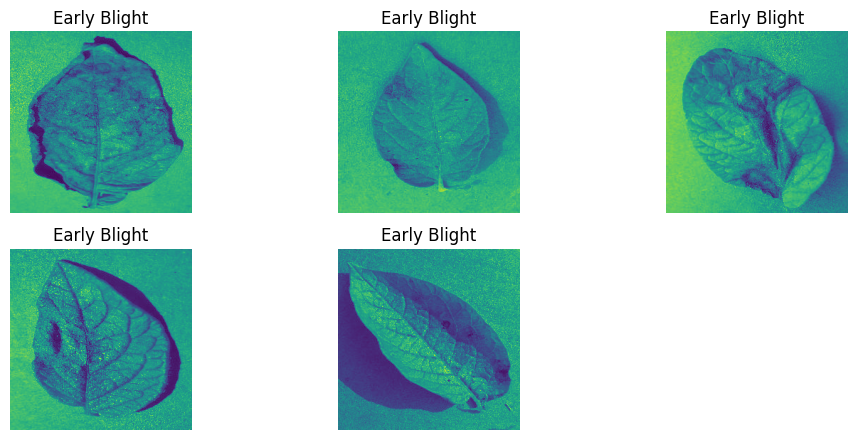

In [60]:
plt.figure(figsize=(12,8))
p = os.listdir('/content/drive/MyDrive/Fungal/SmallFungalDataset/Training/')
c=1
for i in os.listdir('/content/drive/MyDrive/Fungal/SmallFungalDataset/Training/Late_Blight/')[:9]:
    plt.subplot(3,3,c)
    
    img = cv2.imread('/content/drive/MyDrive/Fungal/SmallFungalDataset/Training/Late_Blight/'+i,0)
    
    if img is None:
        print('Wrong path:', path)
    
    else:
        img1 = cv2.resize(img, (200,200))
        img1 = img1.reshape(1,-1)/255
        p = sv.predict(img1)
        plt.title(dec[p[0]])
        plt.imshow(img)
        plt.axis('off')
        c+=1